In [1]:
import struct
from mayavi import mlab
import pandas  as pd
import numpy as np

# data_path = r'D:\01_DEV\Python\3DAnalysis\data\Unit_0_0_1.bin'
data_path = r'D:\01_DEV\Python\3DAnalysis\data\Chip_323_124.dat'

struct_fmt = 'iifii'

float_size = struct.calcsize('f')

with open(data_path, 'rb') as file:
    
    data = file.read(struct.calcsize(struct_fmt))

    width, height, depth, roi_cnt, img2d = struct.unpack(struct_fmt, data)

    if width > 0 and height > 0:

        height_fmt = 'f' * width * height
        height_data_size = struct.calcsize(height_fmt)
        height_data = file.read(height_data_size)

        Z = struct.unpack(height_fmt, height_data)
        Z = np.array(Z)
        Z = Z.reshape(height,width)

gap = 5.9
X = np.linspace(0, (width-1)*gap, width)
Y = np.linspace(0, (height-1)*gap, height)

X, Y = np.meshgrid(X, Y)


In [2]:
from scipy.spatial import Delaunay

X1 = X.flatten()
Y1 = Y.flatten()
Z1 = Z.flatten()

# x, y 좌표를 사용하여 2D Delaunay 삼각화를 수행합니다.
# 이는 z 값을 높이로 사용하는 3D 서피스를 생성하는 데 사용됩니다.
tri = Delaunay(np.vstack((X1, Y1)).T)

# Mayavi를 사용하여 시각화합니다.
mlab.figure(bgcolor=(1, 1, 1))
mlab.triangular_mesh(X1, Y1, Z1, tri.simplices, representation='surface')

# 시각화 창을 보여줍니다.
mlab.show()

In [3]:

mlab.figure(bgcolor=(0, 0, 0))

points = mlab.points3d(X, Y, Z,          # x, y, z 좌표 및 스칼라 값으로 z 사용
                       mode='point',        # 포인트 모드로 표시
                       colormap='Blues', # 색상 맵 지정
                       scale_mode='none',   # 모든 포인트에 동일한 스케일 적용
                       scale_factor=1)    # 포인트의 크기 설정

mlab.show()

In [4]:

mlab.figure(bgcolor=(0, 0, 0))
mlab.surf(X, Y, Z)

mlab.colorbar(title='Z Height', orientation='vertical')

mlab.show()

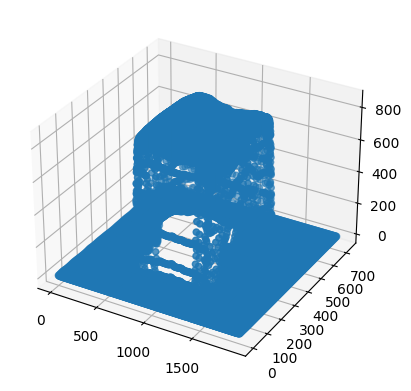

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)
plt.show()